In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
# Read the shoreline and bluff edges into a GeoDataFrame (to get get intersection points with transect)
gdf_be = gpd.read_file('raw_datasets/gibbs/BarterIsland_BluffEdge_1950to2020.zip').to_crs(crs=4326)
gdf_sl = gpd.read_file('raw_datasets/gibbs/BarterIsland_Shoreline_1947to2020.zip').to_crs(crs=4326)

# Read the shoreline and bluff edge change rate into a GeoDataFrame (to get transects)
gdf_be_cr = gpd.read_file('raw_datasets/gibbs/BarterIsland_BluffTransect_ChangeRates_1950to2020.zip').to_crs(crs=4326)
# gdf_sl_cr = gpd.read_file('raw_datasets/gibbs/BarterIsland_ShoreTransect_ChangeRates_1947to2020.zip')  # not required, transects from bluff edge are used

# Read the bluff edge baseline into a GeoDataFrame (as a reference for the coastal retreat)
gdf_be_bl = gpd.read_file('raw_datasets/gibbs/BarterIsland_BluffEdgeBaseline.zip').to_crs(crs=4326)
gdf_sl_bl = gpd.read_file('raw_datasets/gibbs//BarterIsland_ShorelineBaseline.zip').to_crs(crs="4326")


In [4]:
# csv file containing transects with bathymetric data for Barter island (measured in 2010-2011)
df = pd.read_csv("raw_datasets/erikson/Beachprofiledat/BTI_20102011BeachProfiles_Data.csv")

# use only central barter island
df = df[df.Site=="Central Barter Island"]

# convert to geodataframe
gdf_beach_profiles = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")



# gdf_beach_profiles.TransectID.unique()

gdf_beach_profiles.head()

,TransectID,Longitude,Latitude,Northing,Easting,AcquireDate,CumlDist_m,Ht_Ell,Ht_MSL,Site,geometry
0,BTI-T1,-143.624821,70.133355,7782889.16,400474.51,27-Aug-10,0.00,6.11,8.41,Central Barter Island,POINT (-143.62482 70.13335)
1,BTI-T1,-143.624825,70.133377,7782891.62,400474.48,27-Aug-10,2.46,5.83,8.13,Central Barter Island,POINT (-143.62482 70.13338)
2,BTI-T1,-143.624821,70.133395,7782893.58,400474.72,27-Aug-10,4.43,5.61,7.91,Central Barter Island,POINT (-143.62482 70.13339)
3,BTI-T1,-143.624826,70.133416,7782895.98,400474.62,27-Aug-10,6.84,5.21,7.51,Central Barter Island,POINT (-143.62483 70.13342)
4,BTI-T1,-143.624826,70.133429,7782897.44,400474.69,27-Aug-10,8.30,4.69,6.99,Central Barter Island,POINT (-143.62483 70.13343)


The plots below show the measured beach profile. Clearly, this is only the beach and not any bathymetric. We need the bathymetric data from Erikson datasets.

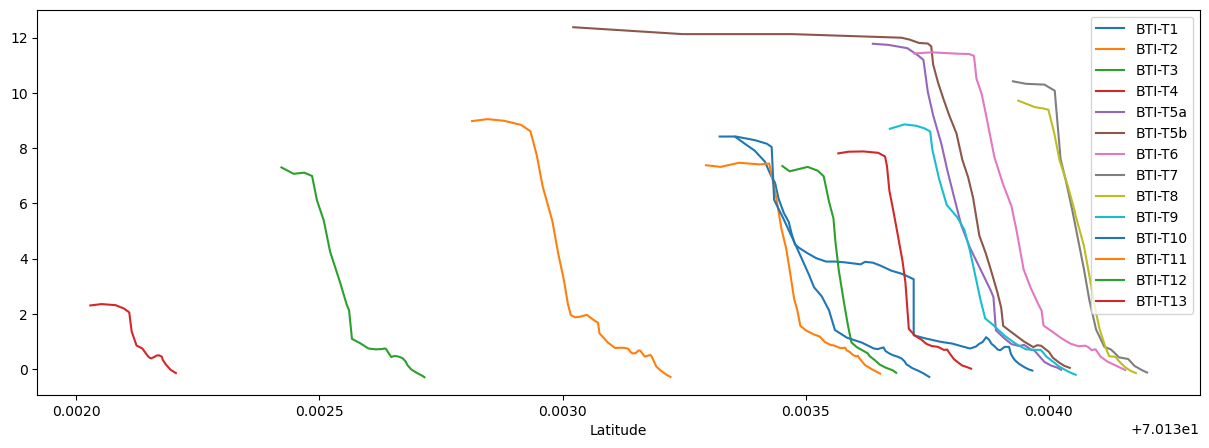

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

for id in gdf_beach_profiles.TransectID.unique():
    gdf_beach_profiles[gdf_beach_profiles.TransectID==id].plot(ax=ax, kind='line', column='TransectID', x='Latitude', y='Ht_MSL', legend=True, label=id)

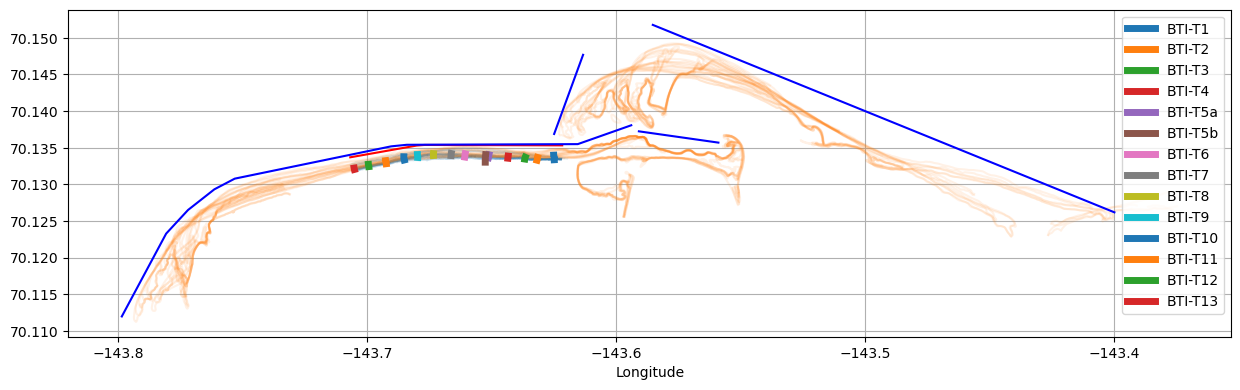

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_be.plot(ax=ax, color='C0', alpha=0.1)
gdf_sl.plot(ax=ax, color='C1', alpha=0.1)

# gdf_be_cr[gdf_be_cr.TransectID==transect_id].plot(ax=ax, color='red')
# gdf_sl_cr[gdf_sl_cr.TransectID==transect_id].plot(ax=ax, color='blue')

gdf_be_bl.plot(ax=ax, color='red')
gdf_sl_bl.plot(ax=ax, color='blue')

# gdf_beach_profiles.plot(color='k', alpha=0.5, ax=ax)

for id in gdf_beach_profiles.TransectID.unique():
    gdf_beach_profiles[gdf_beach_profiles.TransectID==id].plot(ax=ax, kind='line', column='TransectID', x='Longitude', y='Latitude', legend=True, label=id, linewidth=5)

# ax.set_xlim((-143.75, -143.6))
# ax.set_ylim((70.13, 70.14))

ax.grid()

Now lets include bathymetric data

In [7]:
# csv file containing bathymetric data (i.e., depth relative to MSL and absolute water depth at time of measurement) obtained trough different systems (measured between 2010 and 2011)
df_bath = pd.read_csv("raw_datasets/erikson/Single_beambath/BTI_20102011Bathymetry_Data.csv")

# Let us use only the relevant values on the northern shore of central barter island
mask = (df_bath.SYSTEM=='Humminbird') * (df_bath["Longitude"] > -143.75) * (df_bath["Longitude"] < -143.6) * (df_bath["Latitude"] > 70.12)
df_bath = df_bath[mask]

gdf_bath = gpd.GeoDataFrame(df_bath, geometry=gpd.points_from_xy(df_bath.Longitude.values, df_bath.Latitude.values, crs=4326))

gdf_bath.head()

,UTC_Date,UTC_Time,Longitude,Latitude,Depth_MSL,TRUDEPTH_M,SYSTEM,geometry
1362,08/25/2010,NaN,-143.600171,70.137998,NaN,1.65,Humminbird,POINT (-143.60017 70.13800)
1363,08/25/2010,NaN,-143.600396,70.138007,NaN,1.65,Humminbird,POINT (-143.60040 70.13801)
1364,08/25/2010,NaN,-143.600620,70.138019,NaN,1.65,Humminbird,POINT (-143.60062 70.13802)
1365,08/25/2010,NaN,-143.600863,70.138031,NaN,1.55,Humminbird,POINT (-143.60086 70.13803)
1366,08/25/2010,NaN,-143.601096,70.138037,NaN,1.65,Humminbird,POINT (-143.60110 70.13804)


In [8]:
gdf_bath.head()# print(gdf_bath.describe())

gdf_bath.isna().sum()

UTC_Date         0
UTC_Time      2878
Longitude        0
Latitude         0
Depth_MSL     2878
TRUDEPTH_M       0
SYSTEM           0
geometry         0
dtype: int64

In [9]:
mask = gdf_be.Year_ == 2010

gdf_be = gdf_be[mask]
gdf_be.head()

,Date_,Year_,UNCY,Feature,Source,geometry
129,09/06/2010,2010,1.8,Gully fill,"Maxar WV02, Panchromatic satellite imagery","LINESTRING (-143.67547 70.13402, -143.67589 70..."
130,07/25/2010,2010,1.5,Gully fill,"Maxar WV02, Panchromatic satellite imagery","LINESTRING (-143.67587 70.13400, -143.67548 70..."
131,07/25/2010,2010,1.5,Top of bluff,"Maxar WV02, Panchromatic satellite imagery","LINESTRING (-143.67548 70.13402, -143.67532 70..."
133,09/06/2010,2010,1.8,Top of bluff,"Maxar WV02, Panchromatic satellite imagery","LINESTRING (-143.65681 70.13389, -143.65685 70..."
135,09/06/2010,2010,1.8,Gully fill,"Maxar WV02, Panchromatic satellite imagery","LINESTRING (-143.63908 70.13367, -143.63866 70..."


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_33180\768810750.py:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_bath.plot(column='TRUDEPTH_M', ax=ax, color='pink', markersize=0.1, label='bathymetric survey', aspect='auto')


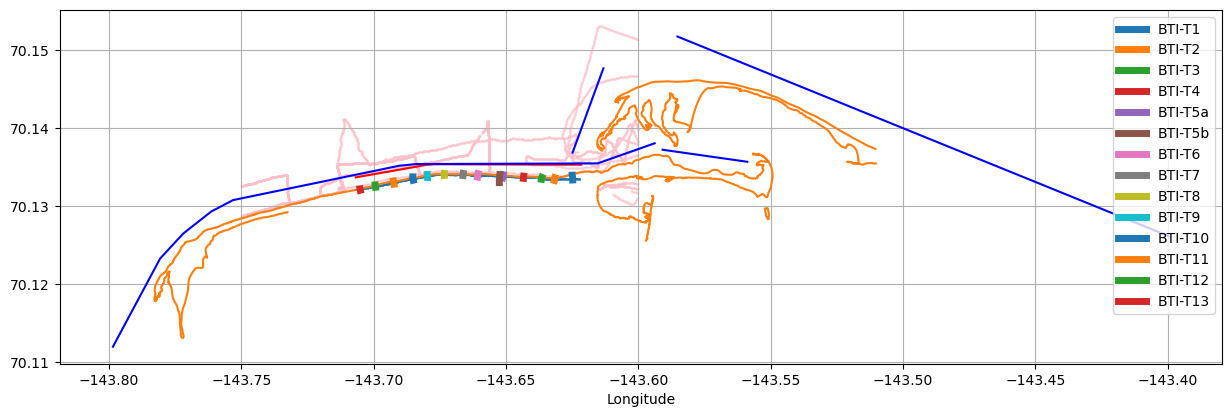

In [10]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_be[(gdf_be.Year_ == 2010) + (gdf_be.Year_ == 2011)].plot(ax=ax, color='C0', label='bluff edge through the years')
gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='C1', label='shoreline through the years')

# gdf_be_cr[gdf_be_cr.TransectID==transect_id].plot(ax=ax, color='red')
# gdf_sl_cr[gdf_sl_cr.TransectID==transect_id].plot(ax=ax, color='blue')

gdf_be_bl.plot(ax=ax, color='red', label='bluff edge baseline')
gdf_sl_bl.plot(ax=ax, color='blue', label='shoreline baseline')

for id in gdf_beach_profiles.TransectID.unique():
    gdf_beach_profiles[gdf_beach_profiles.TransectID==id].plot(ax=ax, kind='line', column='TransectID', x='Longitude', y='Latitude', legend=True, label=id, linewidth=5)
    
gdf_bath.plot(column='TRUDEPTH_M', ax=ax, color='pink', markersize=0.1, label='bathymetric survey', aspect='auto')


# ax.legend()

# ax.set_xlim((-143.66, -143.65))
# ax.set_ylim((70.13, 70.142))

ax.grid()

There is one obvious bathymetric transect, at about -143.66 longitude. Let's have a look at that.

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_33180\3828412602.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_bath.plot(column='TRUDEPTH_M', ax=ax, color='pink', markersize=1, label='bathymetric survey', aspect='auto')


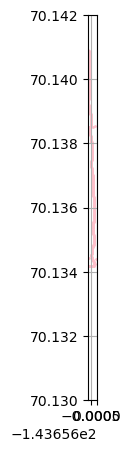

In [11]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_bath.plot(column='TRUDEPTH_M', ax=ax, color='pink', markersize=1, label='bathymetric survey', aspect='auto')

ax.set_xlim((-143.6568, -143.656))
ax.set_ylim((70.13, 70.142))

ax.grid()

<Axes: xlabel='Latitude'>

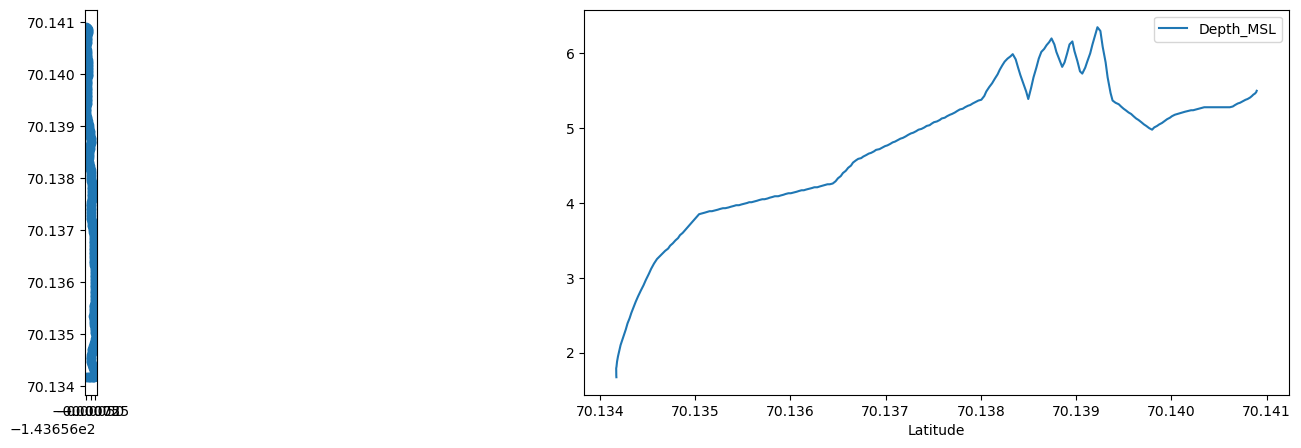

In [12]:
mask = (gdf_bath.Longitude > -143.6568) * (gdf_bath.Longitude < -143.656) * (gdf_bath.Latitude < 70.142) * (gdf_bath.Latitude > 70.13)

gdf_bath_masked = gdf_bath[mask].dropna()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

gdf_bath_masked.plot(ax=axs[0], )
gdf_bath_masked.plot(ax=axs[1], x='Latitude', y='Depth_MSL', kind='line')

Now lets look at the total profile, of bathymetric data AND beach profile data. Transects BTI-T5b and BTI-T6 are located closed to the available bathymetric transect, so those are plotted.

In [13]:
gdf_bath_masked.head()

,UTC_Date,UTC_Time,Longitude,Latitude,Depth_MSL,TRUDEPTH_M,SYSTEM,geometry
42609,07/10/2011,22:29:11,-143.656742,70.134173,1.67,1.69,Humminbird,POINT (-143.65674 70.13417)
42610,07/10/2011,22:29:12,-143.656661,70.134172,1.69,1.71,Humminbird,POINT (-143.65666 70.13417)
42611,07/10/2011,22:29:13,-143.656598,70.134172,1.72,1.74,Humminbird,POINT (-143.65660 70.13417)
42612,07/10/2011,22:29:14,-143.656517,70.134172,1.74,1.76,Humminbird,POINT (-143.65652 70.13417)
42613,07/10/2011,22:29:15,-143.656455,70.134172,1.76,1.78,Humminbird,POINT (-143.65645 70.13417)


In [14]:
# convert to epsg=26907 to get x values in [m]

x_bath = gdf_bath_masked.to_crs(epsg=26907).geometry.y.values
y_bath = gdf_bath_masked.to_crs(epsg=26907).Depth_MSL.values * -1

x_beach_T5b = gdf_beach_profiles[gdf_beach_profiles.TransectID=='BTI-T5b'].to_crs(epsg=26907).geometry.y.values
y_beach_T5b = gdf_beach_profiles[gdf_beach_profiles.TransectID=='BTI-T5b'].Ht_MSL

x_beach_T6 = gdf_beach_profiles[gdf_beach_profiles.TransectID=='BTI-T6'].to_crs(epsg=26907).geometry.y.values
y_beach_T6 = gdf_beach_profiles[gdf_beach_profiles.TransectID=='BTI-T6'].Ht_MSL

print(min(y_beach_T6))
print(min(y_beach_T5b))

-0.04
0.04


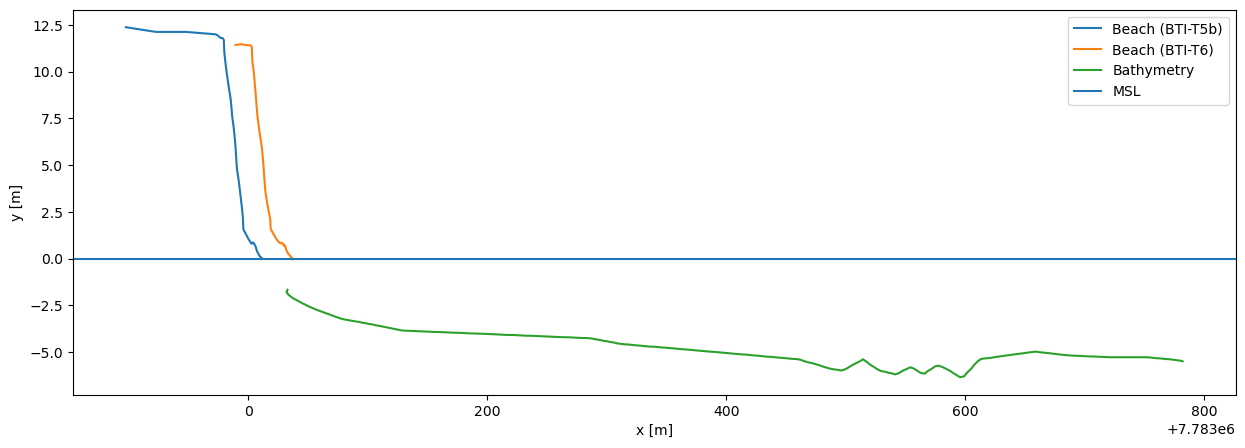

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(x_beach_T5b, y_beach_T5b, label='Beach (BTI-T5b)')
ax.plot(x_beach_T6, y_beach_T6, label='Beach (BTI-T6)')
ax.plot(x_bath, y_bath, label='Bathymetry')

ax.axhline(y=0, label='MSL')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

ax.legend()

There is a gap in the beach data. We might therefore need to assume an equillibrium profile. In order to calculate A, we need the fall velocity. I start with sediment size:

In [16]:
df_sediment = pd.read_csv("raw_datasets/erikson/Meangrainsizeof/BTI_2011GrainSize_Data.csv")

gdf_sediment = gpd.GeoDataFrame(df_sediment, geometry=gpd.points_from_xy(df_sediment.Longitude.values, df_sediment.Latitude.values, crs=4326))

gdf_sediment.describe()

,Longitude,Latitude,Mean_mm,STDev_mm
count,54.000000,54.000000,54.000000,54.000000
mean,-143.883635,70.109562,3.038148,0.688889
std,0.079103,0.010806,2.610751,0.996262
min,-144.021510,70.087750,0.260000,0.000000
25%,-143.927290,70.104713,1.480000,0.170000
50%,-143.902170,70.109995,2.015000,0.365000
75%,-143.829387,70.118675,3.370000,0.737500
max,-143.755050,70.127780,12.240000,6.280000


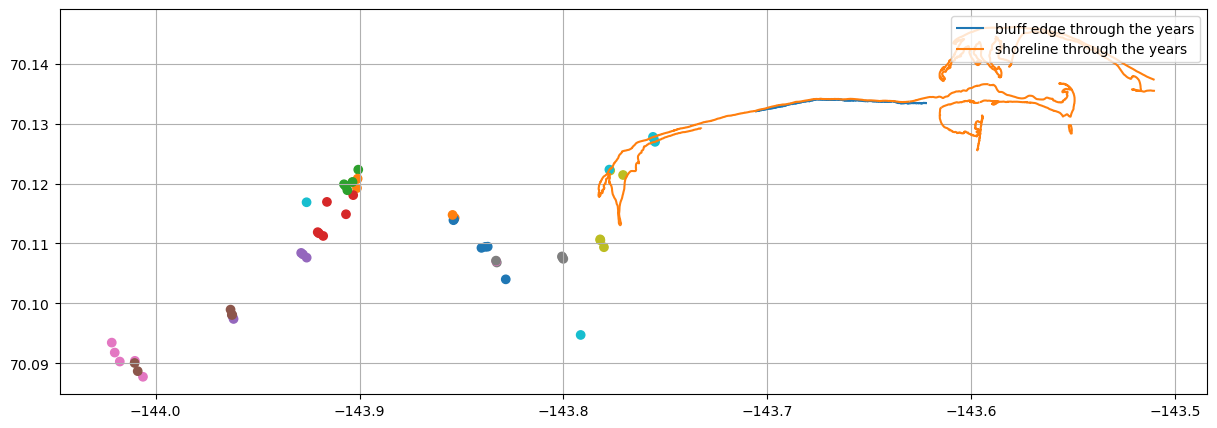

In [17]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_be[(gdf_be.Year_ == 2010) + (gdf_be.Year_ == 2011)].plot(ax=ax, color='C0', label='bluff edge through the years')
gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='C1', label='shoreline through the years')

gdf_sediment.plot(ax=ax, column='SampleID', legend=True)

ax.grid()
ax.legend()

Only 1 sample close to the location of interest. Let's isolate it.

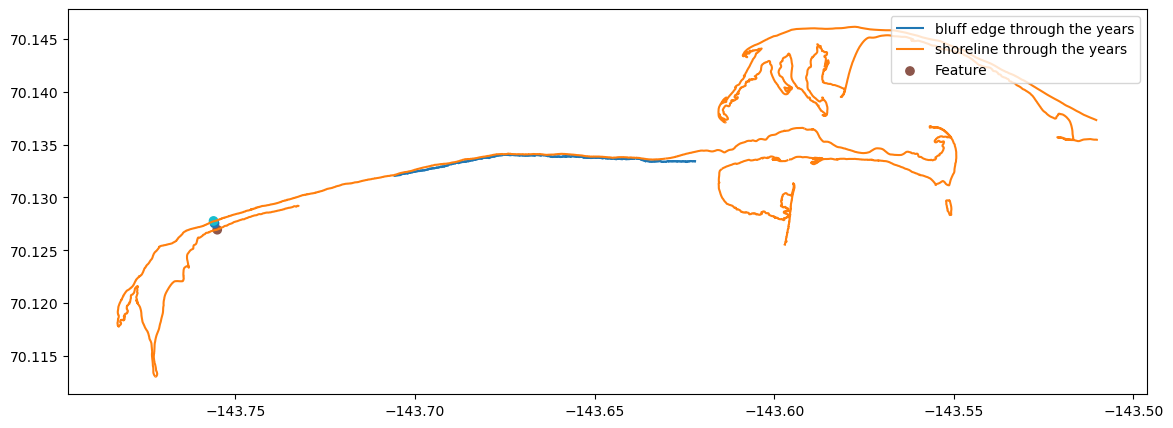

In [18]:
mask = (gdf_sediment.Longitude > -143.77)

gdf_sediment_masked = gdf_sediment[mask]

fig, ax = plt.subplots(figsize=(15,5))

gdf_be[(gdf_be.Year_ == 2010) + (gdf_be.Year_ == 2011)].plot(ax=ax, color='C0', label='bluff edge through the years')
gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='C1', label='shoreline through the years')

gdf_sediment_masked.plot(ax=ax, column='SampleID')

plt.legend()

In [19]:
display(gdf_sediment_masked)

,SampleID,ProfileID,Longitude,Latitude,UTC_Date,Type,Feature,Mean_mm,STDev_mm,Comments,geometry
0,AR16-LS,AR16,-143.75505,70.12695,2011-Jul-11 00:42:36,Terrestrial,Lagoon shoreline,1.45,0.19,"Sample moist, coarse sands",POINT (-143.75505 70.12695)
1,AR16-BC,AR16,-143.75580,70.12755,2011-Jul-11 00:40:48,Terrestrial,Berm crest,4.55,1.96,"Sands, poorly sorted, some gravels",POINT (-143.75580 70.12755)
2,AR16-WL,AR16,-143.75607,70.12778,2011-Jul-11 00:34:58,Terrestrial,Water line,1.90,0.05,"Samples moist, sands",POINT (-143.75607 70.12778)


For now assume the mean sediment size from the water line. Iteratively:

In [20]:
s = 2.65
D = 1.90 * 10**-3
g = 9.81
nu = 10**-6

# low reynolds
ws_low = (s-1) * g * D**2 / (18 * nu)
Re_low = ws_low * D / nu

print("Re_low: ", Re_low)

# high reynolds
ws_high = 1.6 * np.sqrt(g*D*(s-1))
Re_high = ws_high * D / nu

print("Re_high: ", Re_high)

print(ws_low)
print(ws_high)

Re_low:  6167.95575
Re_high:  533.1223133203112
3.2462925
0.2805906912212164


In [21]:
g = 9.81
vkarman = 0.40
visc_kin = 1.36 * 10**-6
rho_w = 1027
rho_s = 2650

d = 1.90 * 10**-3  # m

Dstar = (g * (rho_s/rho_w - 1) / (visc_kin**2))**(1/3) * d
ws = (visc_kin/d) * (np.sqrt(10.36**2 +1.049 * (Dstar**3))-10.36)

print(ws)

0.1685222373556569


In [22]:
def calc_A(w_s):
    return 0.5 * w_s**0.44

A_low = calc_A(ws_low)
A_high = calc_A(ws_high)
A = calc_A(ws)

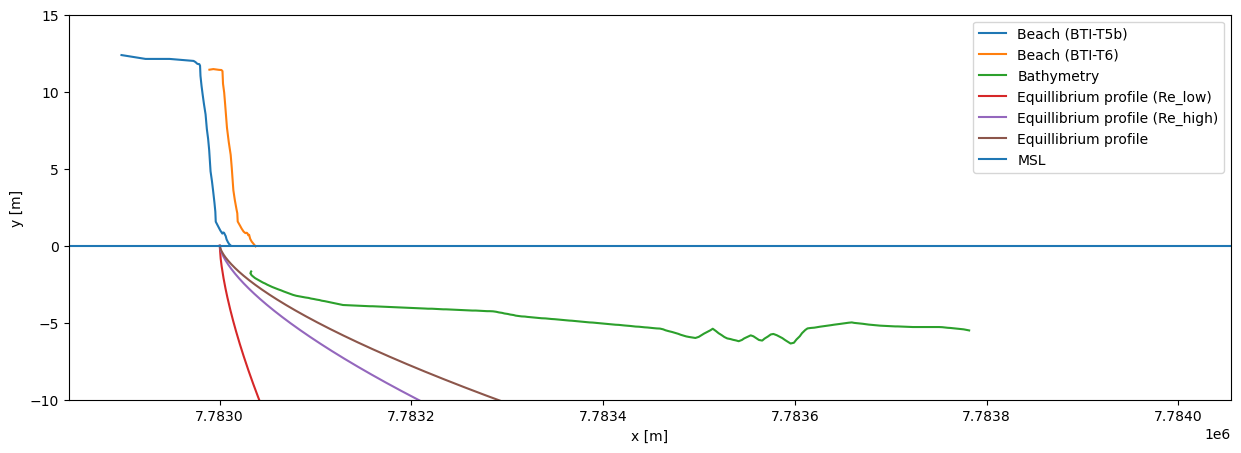

In [23]:
x0 = 7.783 * 10**6
x_eq = np.linspace(0, 1000, 1000+1)

y_eq_low = - A_low * x_eq**(2/3)
y_eq_high = - A_high * x_eq**(2/3)
y_eq = - A * x_eq**(2/3)


fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(x_beach_T5b, y_beach_T5b, label='Beach (BTI-T5b)')
ax.plot(x_beach_T6, y_beach_T6, label='Beach (BTI-T6)')
ax.plot(x_bath, y_bath, label='Bathymetry')

ax.plot(x0 + x_eq, y_eq_low, label='Equillibrium profile (Re_low)')
ax.plot(x0 + x_eq, y_eq_high, label='Equillibrium profile (Re_high)')
ax.plot(x0 + x_eq, y_eq, label='Equillibrium profile')

ax.axhline(y=0, label='MSL')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

ax.set_ylim((-10, 15))

ax.legend()

For now, let's be pragmatic and use the bathymetry from BTI-T5b with the determined transect, and linearly interpolate between the two. The furthest offshore point is used as the baseline for now.

In [24]:
x0 = max(x_bath)

n_points_interpolate = 10

total_transect_x = np.zeros((len(x_bath) + n_points_interpolate + len(x_beach_T5b)))
total_transect_y = np.zeros(total_transect_x.shape)

total_transect_x[0:len(x_bath)] = x0 - np.flip(x_bath)
total_transect_y[0:len(x_bath)] = np.flip(y_bath)

total_transect_x[len(x_bath):len(x_bath)+n_points_interpolate] = np.linspace(max(x0 - np.flip(x_bath)), 
                                                                            min(x0 - np.flip(x_beach_T5b)), 
                                                                            n_points_interpolate)
total_transect_y[len(x_bath):len(x_bath)+n_points_interpolate] = np.linspace(max(y_bath), 
                                                                            min(y_beach_T5b), 
                                                                            n_points_interpolate)

total_transect_x[len(x_bath)+n_points_interpolate:] = x0 - np.flip(x_beach_T5b)
total_transect_y[len(x_bath)+n_points_interpolate:] = np.flip(y_beach_T5b)

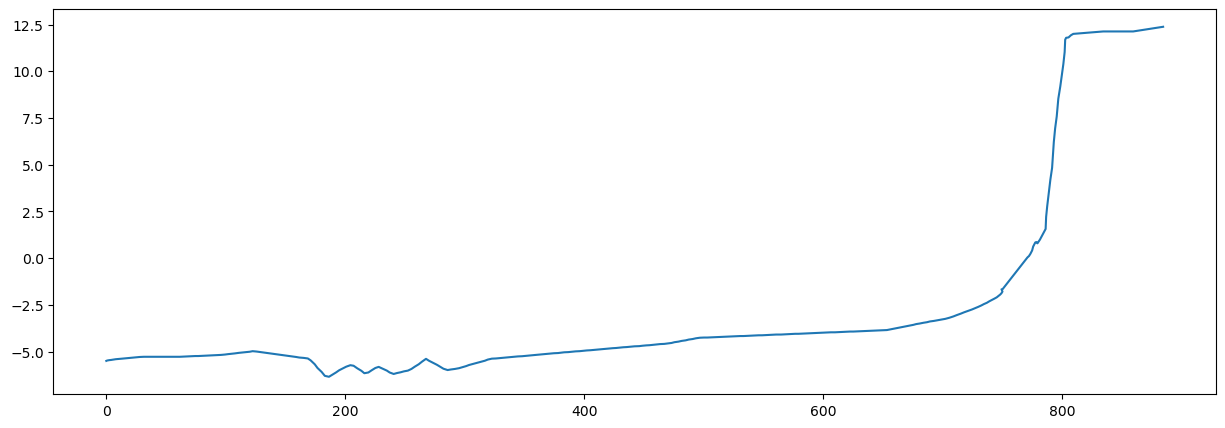

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(total_transect_x, total_transect_y)

let's save this for now to do some testing

In [26]:
# np.savetxt(os.path.join("initial_conditions/", "x.gr"), total_transect_x)
# np.savetxt(os.path.join("initial_conditions/", "bed.dep"), total_transect_y)

Let's check if the bed measurement dataset has anything useful.

In [27]:
df_bed_meas = pd.read_csv("raw_datasets/erikson/Conductivity_te/BTI_2011TimeSeriesData_CTD.csv")

gdf_bed_meas = gpd.GeoDataFrame(df_bed_meas, geometry=gpd.points_from_xy(df_bed_meas.Longitude.values, df_bed_meas.Latitude.values, crs=4326))

gdf_bed_meas.head()

gdf_bed_meas.describe()

gdf_bed_meas.SiteID.unique()

array(['BI01', 'BL04', 'WS01', 'WS02'], dtype=object)

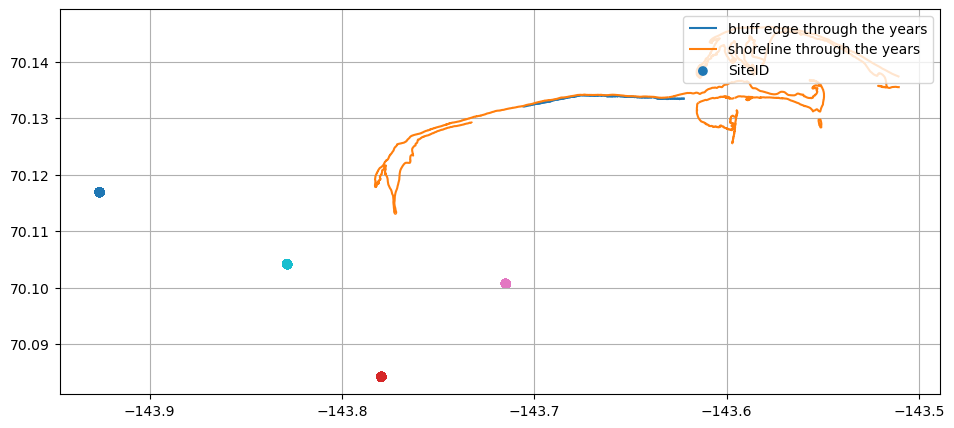

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_be[(gdf_be.Year_ == 2010) + (gdf_be.Year_ == 2011)].plot(ax=ax, color='C0', label='bluff edge through the years')
gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='C1', label='shoreline through the years')

gdf_bed_meas.plot(ax=ax, column='SiteID', legend=True, label='SiteID')

ax.grid()
ax.legend()

Apparently, it does not.